# Simulating and studying an AR process

In [1]:
import numpy as np
from pandas import DataFrame as df
import importlib
import autoregressive as ar

In [2]:
importlib.reload(ar) # if autoregressive.py is modified 

<module 'autoregressive' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressive.py'>

In [2]:
model = ar.AutoRegressive(steps=1000, paths=1, a=np.array([0.2, 0.9, 0.1]), start=100, dist='normal')
data = model.generate()

100%|██████████| 998/998 [00:00<00:00, 92428.80it/s]

1 different AR(2) processes of 1000 steps have been generated with increments following normal distribution


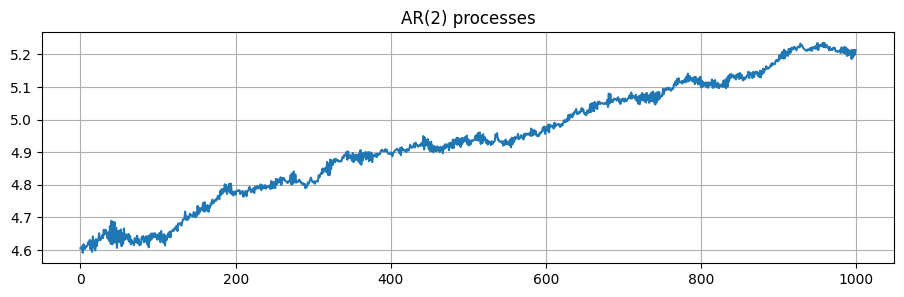

In [3]:
#model.prices_to_log_returns()

model.plot_paths(np.log(data))


In [4]:
coefficients = model.fit_ar()
df(coefficients).head()

,0
0,0.215147
1,0.890349
2,0.109233


In [98]:
comparison = np.vstack([model.coefficients.mean(axis=1), model.a, (model.coefficients.mean(axis=1) - model.a)* 100 / model.a])
df(comparison.T).rename(columns={0: 'Average estimated coefficients', 1: 'Real coefficients', 2: 'Difference %'})

,Average estimated coefficients,Real coefficients,Difference %
0,0.190029,0.2,-4.985550
1,0.287253,0.3,-4.249050
2,0.181326,0.2,-9.337185


100%|██████████| 998/998 [00:00<00:00, 74617.91it/s]



RESIDUALS DIAGNISTIC




DESCRIPTIVE STATISTICS


,0,1,2,3,4,5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001356,0.000075,0.000590,0.000193,0.000563,-0.000228
std,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500
min,-3.011035,-4.288639,-3.122174,-3.304594,-3.550765,-2.666789
25%,-0.649416,-0.683519,-0.682307,-0.641079,-0.730356,-0.691797
50%,-0.012217,0.033172,0.027028,-0.008058,0.005752,-0.031110
75%,0.628104,0.661646,0.695455,0.707810,0.736622,0.633816
max,3.607406,3.620669,3.299116,3.508398,2.879320,3.067519




MOMENTS SUMMARY


,0,1,2,3,4,5
mean,0.001356,0.000075,0.000590,0.000193,0.000563,-0.000228
variance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skewness,0.119859,-0.102409,-0.030097,0.015052,-0.056919,0.150816
kurtosis,3.255331,3.435824,2.813579,3.160778,2.714228,2.828660




JARQUE–BERA NORMALITY TEST RESULTS


,0,1,2,3,4,5
jb stat,5.110787,9.662240,1.599016,1.114821,3.942681,5.014112
p value,0.077662,0.007978,0.449550,0.572690,0.139270,0.081508




AUTOCORRELATION FUNCTION (ACF)


,0,1,2,3,4,5
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.288720,0.172966,0.252341,0.252346,0.242596,0.314100
2,0.333399,0.269828,0.357729,0.363730,0.366344,0.314445
3,0.137038,0.080278,0.136150,0.193874,0.131255,0.160982
4,0.085304,0.055947,0.160957,0.139905,0.119579,0.137559
5,-0.002575,0.033590,0.110396,0.087064,0.043776,0.027259
6,0.007076,0.026694,0.094717,0.083971,0.008446,0.062746
7,0.026162,0.018266,0.064964,0.036417,-0.008115,-0.004031
8,0.024950,0.037072,0.022738,0.015594,-0.033003,0.012960
9,-0.012004,0.009078,0.002184,-0.005422,0.001608,-0.110968


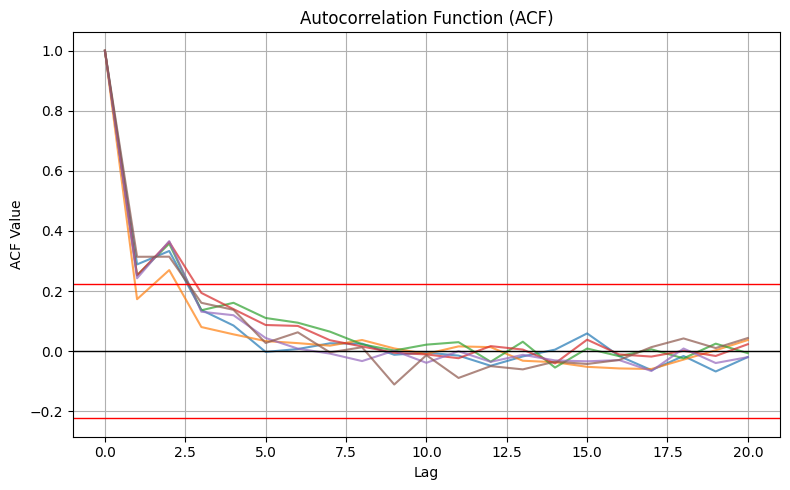



QQ Plots


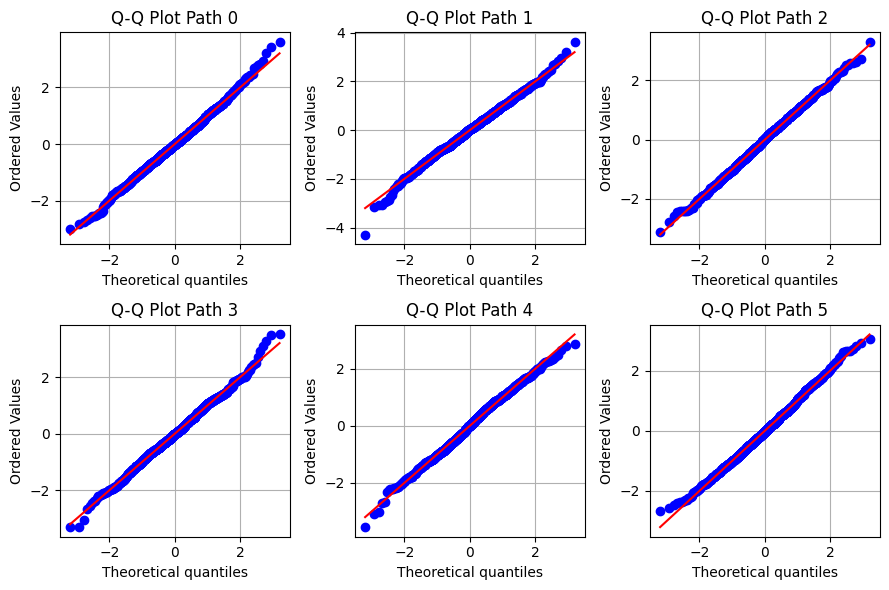

In [99]:
eps, eta = model.get_residuals()
model.study_residuals()